In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

problem1 = pd.read_csv('/kaggle/input/adp-p8/problem1.csv')
problem2 = pd.read_csv('/kaggle/input/adp-p8/problem2.csv', encoding='cp949')


/kaggle/input/adp-p8/problem2.csv
/kaggle/input/adp-p8/problem1.csv
/kaggle/input/adp-p8/problem4.png


데이터 확인 및 전처리

1.1 데이터 EDA 및 시각화

1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

1.3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

1.4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

1.5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

1.6 모델 최적화 방안에 대해 구체적으로 설명하라

데이터 설명
- 성별(sex) 바이너리 : ‘F’ - 여성 또는 ‘M’ - 남성
- 나이(age) 숫자: 15 - 22
- 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 ‘A’: 별거
- 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육
- 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육
- 주보호자(guardian) 명목형 : ‘어머니’, ‘아버지’ 또는 ‘기타’
- 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상
- 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5 ~ 10시간, 4 : 10시간이상
- 학고횟수(failures) 숫자 : 1, 2, 3 else 4
- 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)
- 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)

광고횟수와 광고비에 따른 매출액의 데이터이다

2.1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

2.2 회귀식이 유의한지 판단

In [2]:
problem2

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20
5,6,높음,22
6,7,낮음,24
7,9,높음,26
8,11,높음,28
9,12,낮음,29


A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, 

B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04

라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

3.1 귀무가설과 대립가설을 세워라

3.2 두 평균이 차이가 있는지 검정하라

In [3]:
# 귀무가설: 두 제품의 평균에 차이가 있다
# 대립가설: 두 제품의 평균에 차이가 없다

import scipy.stats as stats
import re

# for each in dir(stats):
#     if re.search('norm', each):
#         print(each)

# norm, normaltest, normal_inverse_gamma

# help(stats.normaltest)

stats.normaltest

<function scipy.stats._stats_py.normaltest(a, axis=0, nan_policy='propagate', *, keepdims=False)>

바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라

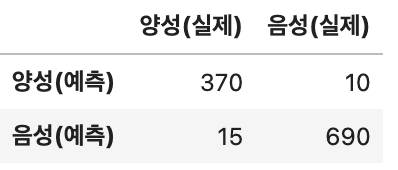
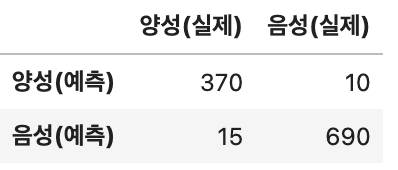

In [4]:
problem4 = pd.DataFrame([[370, 10, '양성(예측)'], [15, 690, '음성(예측)']], columns = ['양성(실제)', '음성(실제)', ''])

problem4 = problem4.set_index('')

problem4

,양성(실제),음성(실제)
,,
양성(예측),370,10
음성(예측),15,690


주어진 데이터에서 신뢰구간을 구하려한다

정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]

데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

5.1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

5.2 sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라